In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
terrorRaw = pd.read_csv('GTD_Data/gtd_0717_final.csv', encoding='ISO-8859-1')
del terrorRaw['Unnamed: 0']
mergedData = pd.read_csv('GTD_Data/gtd_gdp_final_analysis.csv')
del mergedData['Unnamed: 0']
mergedData.dropna()
mergedData.head()

,Year,Country,Total Attacks,Total Attacks Count,Casualities,GDP
0,2008,Australia,0.006536,3.0,0.0,3.657944
1,2008,China,0.043574,20.0,189.0,9.654289
2,2008,Colombia,0.289767,133.0,323.0,3.257048
3,2008,Georgia,0.071897,33.0,75.0,2.418572
4,2008,Iraq,2.409639,1106.0,9414.0,8.228107


## Regression plot for checking the relation between Total Attacks and GDP

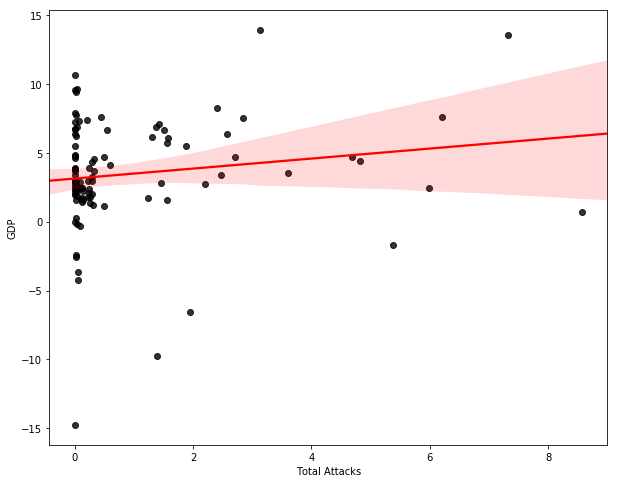

In [3]:
sns.regplot(x="Total Attacks", y="GDP", data=mergedData, scatter_kws={"color": "black"}, line_kws={"color": "red"})
# plt.scatter(mergedData['Total Attacks'], mergedData['GDP'])
fig = plt.gcf()
fig.set_size_inches(10,8)

Text(0.5, 1.0, 'Numbers of Attacks by Each Country ( Ranked by Top in Region )')

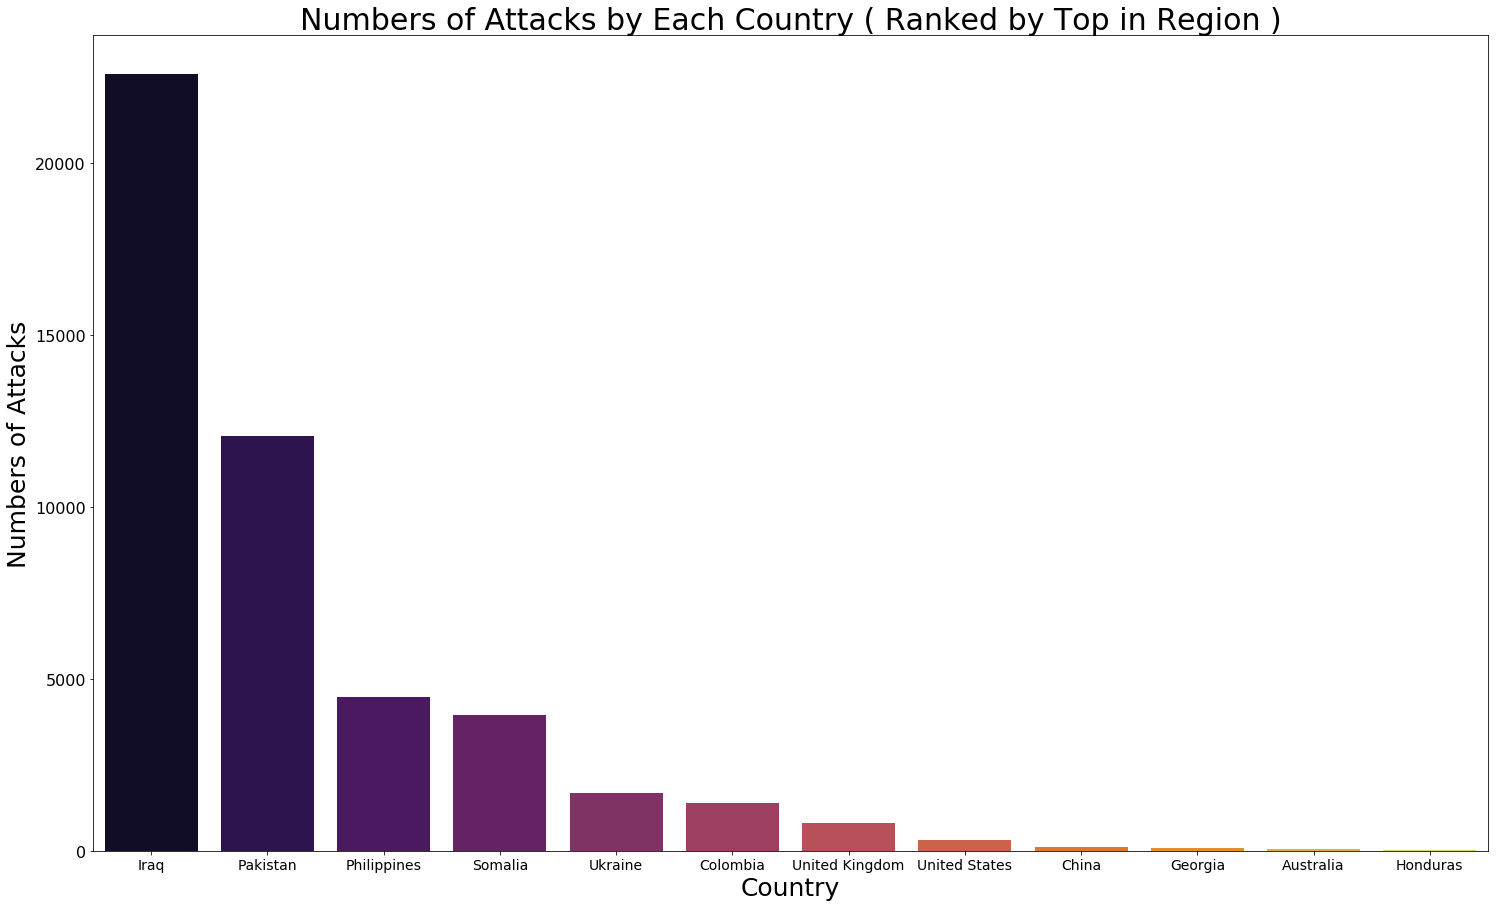

In [4]:
plt.figure(figsize= (25, 15))
xaxis = terrorRaw["Country"].value_counts().index
yaxis = terrorRaw["Country"].value_counts().values
sns.barplot(xaxis, yaxis, palette = 'inferno')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 16)
plt.xlabel('Country', fontsize = 25)
plt.ylabel('Numbers of Attacks', fontsize = 25)
plt.title('Numbers of Attacks by Each Country ( Ranked by Top in Region )', fontsize = 30)

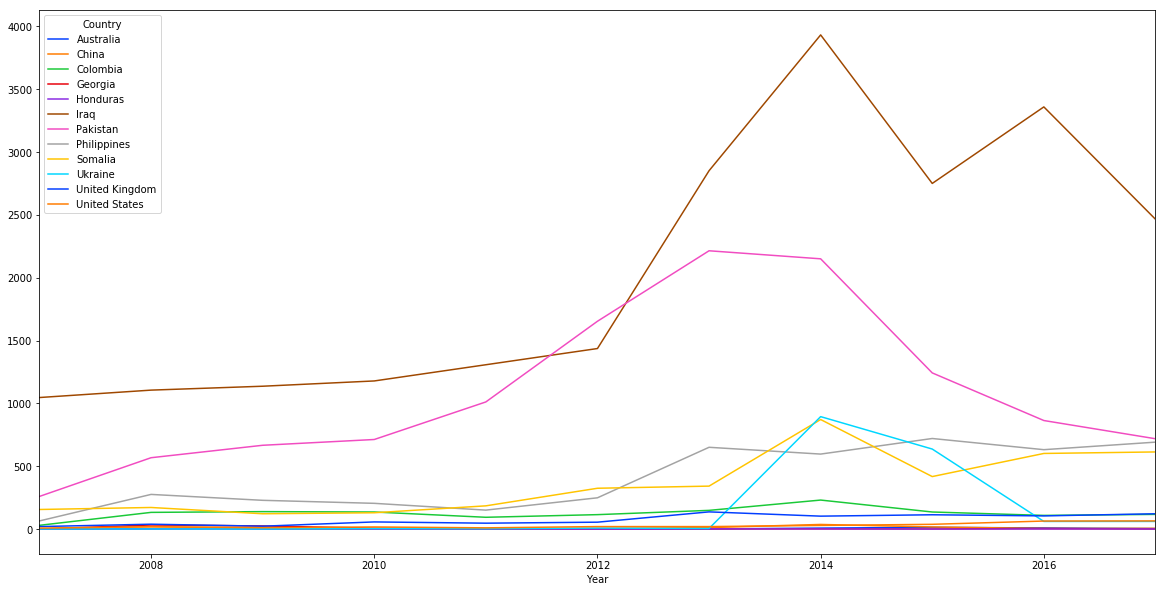

In [5]:
topCountry = terrorRaw[terrorRaw['Country'].isin(terrorRaw['Country'].value_counts().index)]
pd.crosstab(topCountry.Year, topCountry.Country).plot(color = sns.color_palette('bright',10))
fig = plt.gcf()
fig.set_size_inches(20,10)

## Plotting data for some countries to see if there is any relation between GDP and Total Attacks happened over the period of 10 years

In [6]:
# filling the plot between attacks and gdp bar lines, where red means attacks happening more than gdp
def fillBetween():
    plt.fill_between(DF['Year'], DF['Total Attacks'], DF['GDP'],
                where=(DF['Total Attacks'] > DF['GDP']),
                interpolate=True, color='red', alpha=0.25, label='Attacks > GDP')
    plt.fill_between(DF['Year'], DF['Total Attacks'], DF['GDP'],
                where=(DF['Total Attacks'] <= DF['GDP']),
                interpolate=True, alpha=0.25, label='Attacks < GDP')
    plt.legend()

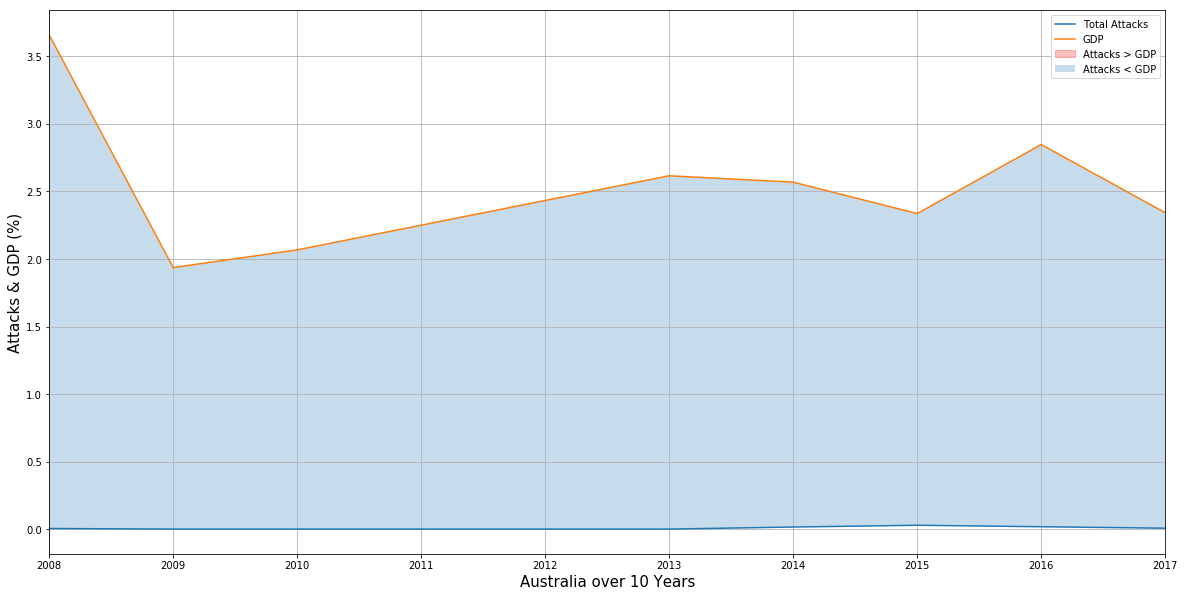

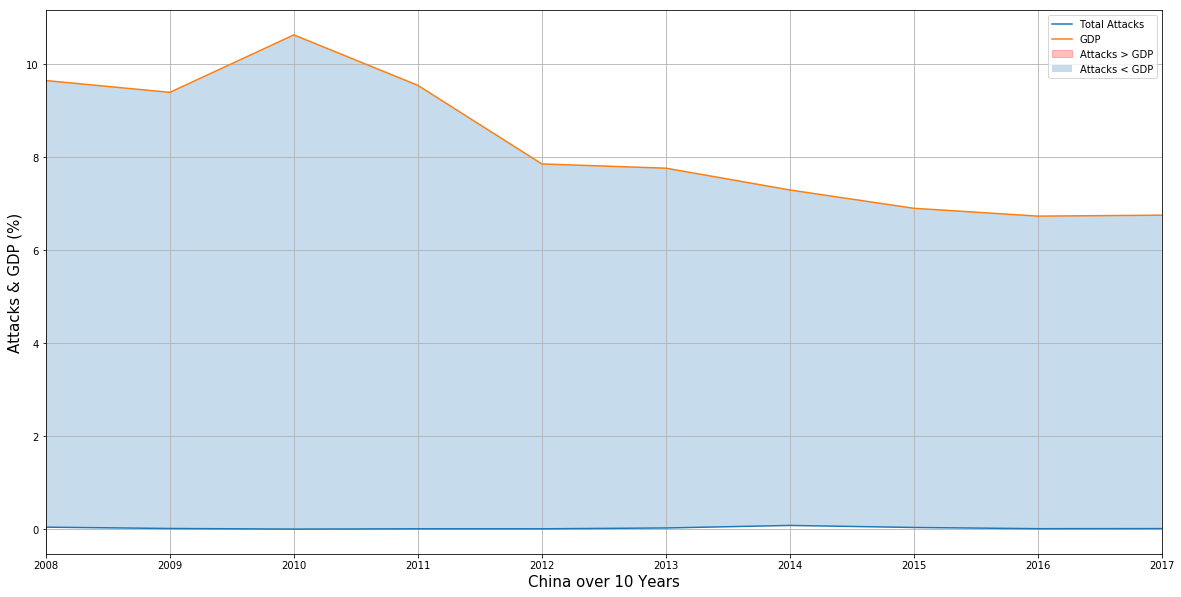

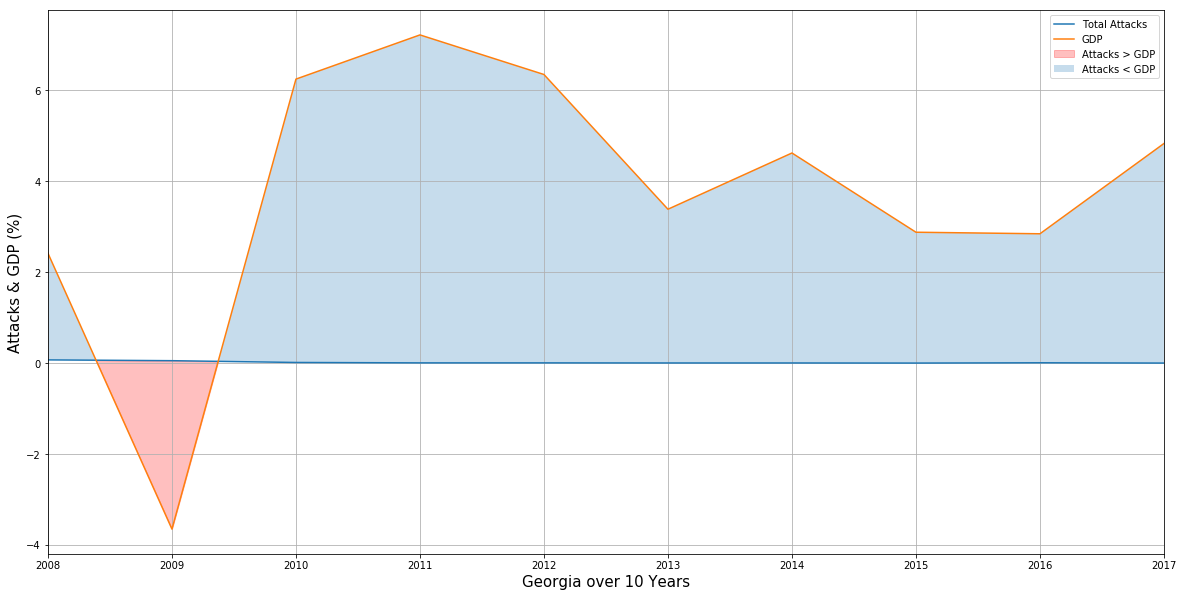

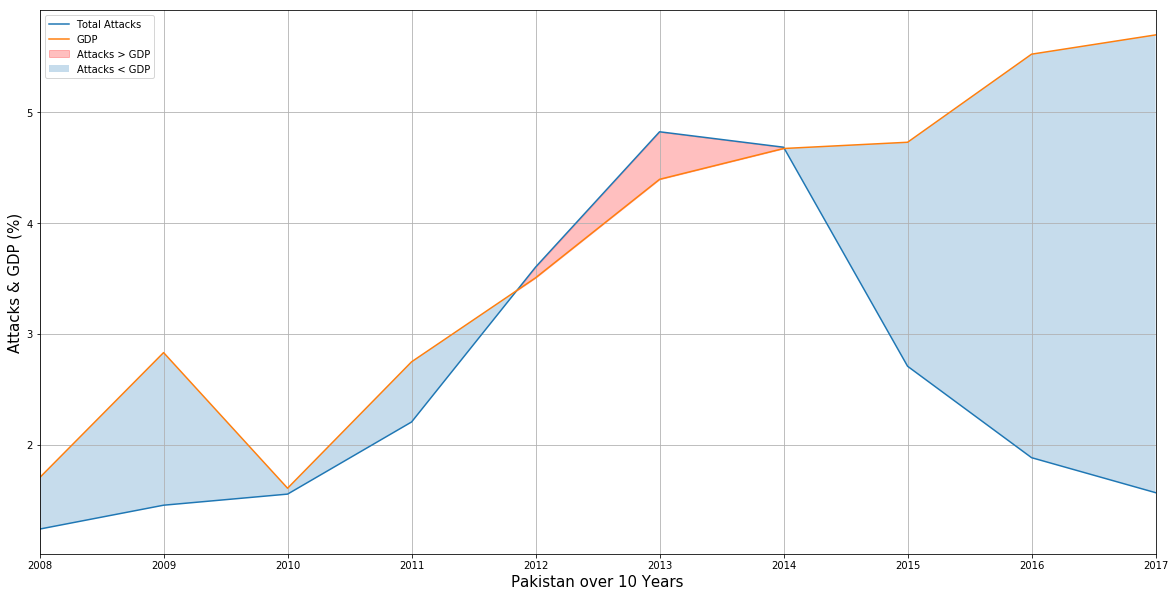

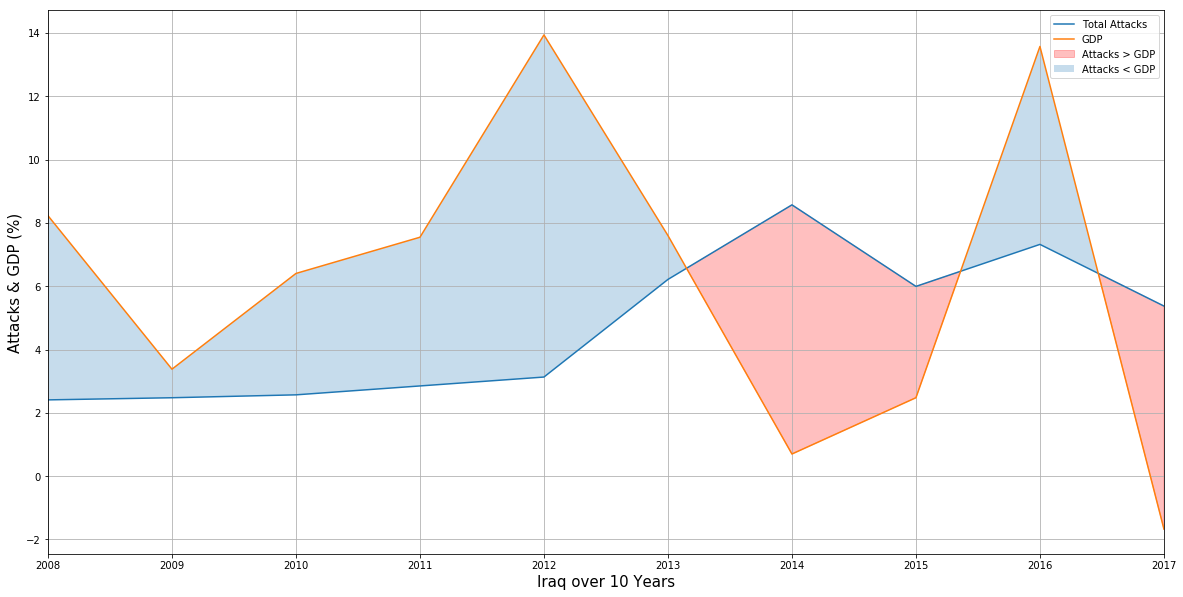

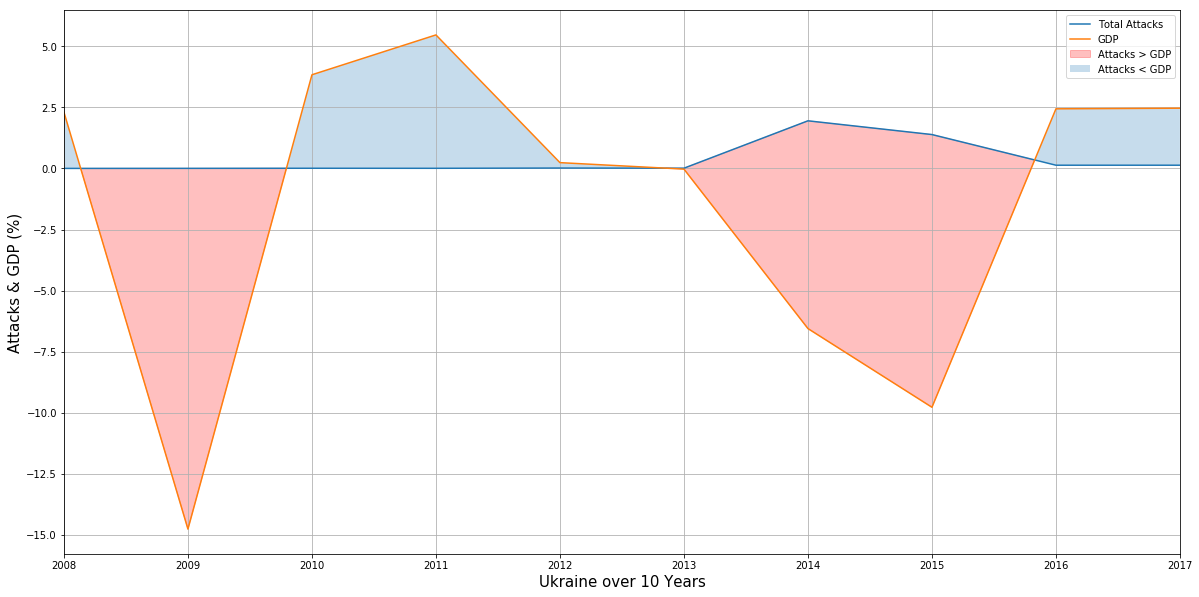

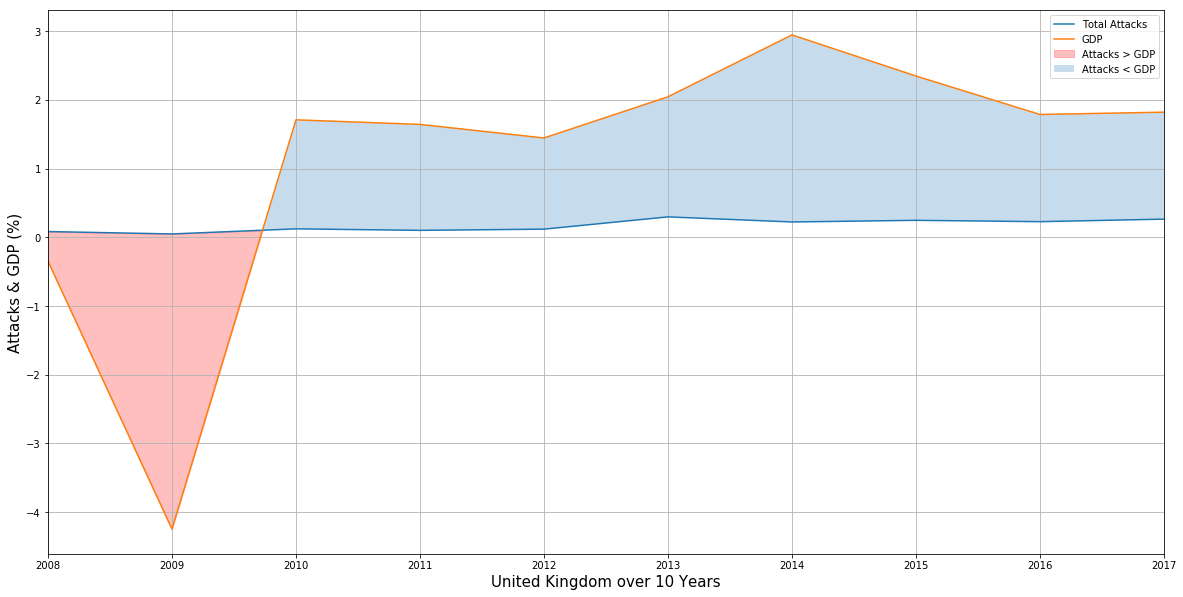

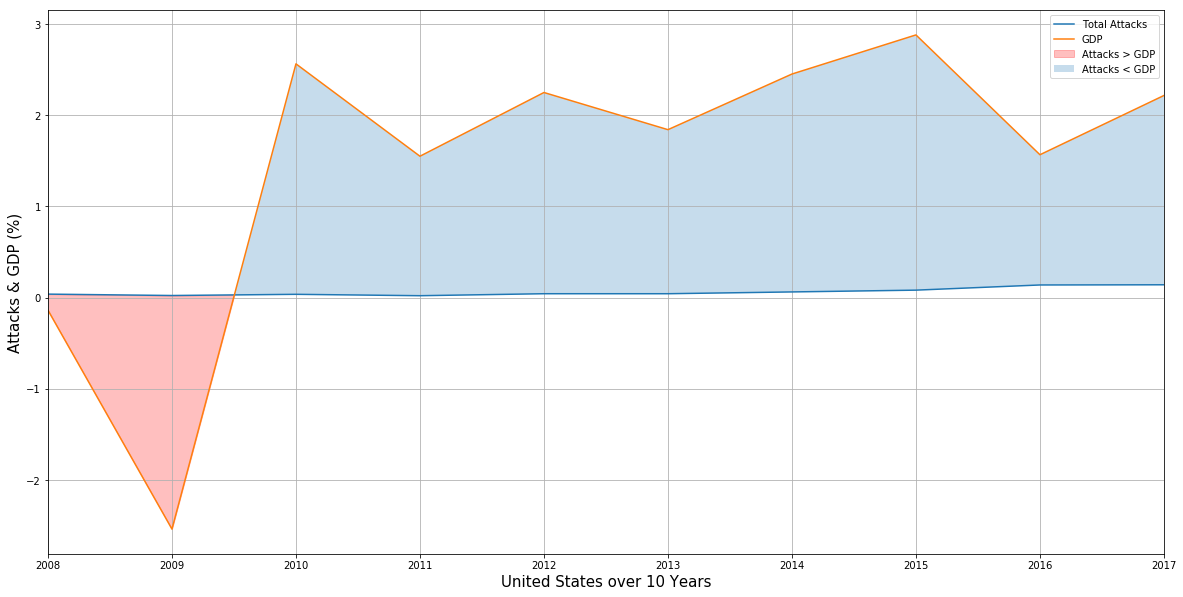

In [7]:
# https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
# https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
#fig, (ax1, ax2) = plt.subplots(1, 2)

fig, ax1 = plt.subplots(1)
DF = mergedData.loc[mergedData['Country'] == 'Australia']
ax1.plot(DF['Year'], DF['Total Attacks'], label='Total Attacks')
ax1.plot(DF['Year'], DF['GDP'], label='GDP')
ax1.grid(True)
ax1.legend()
ax1.set_xlim(2008, 2017)
ax1.set_xlabel('Australia over 10 Years', fontsize = 15)
ax1.set_ylabel('Attacks & GDP (%)', fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(20,10)
fillBetween()

fig, ax2 = plt.subplots(1)
DF = mergedData.loc[mergedData['Country'] == 'China']
ax2.plot(DF['Year'], DF['Total Attacks'], label='Total Attacks')
ax2.plot(DF['Year'], DF['GDP'], label='GDP')
ax2.grid(True)
ax2.legend()
ax2.set_xlim(2008, 2017)
ax2.set_xlabel('China over 10 Years', fontsize = 15)
ax2.set_ylabel('Attacks & GDP (%)', fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(20,10)
fillBetween()

fig, ax3 = plt.subplots(1)
DF = mergedData.loc[mergedData['Country'] == 'Georgia']
ax3.plot(DF['Year'], DF['Total Attacks'], label='Total Attacks')
ax3.plot(DF['Year'], DF['GDP'], label='GDP')
ax3.grid(True)
ax3.legend()
ax3.set_xlim(2008, 2017)
ax3.set_xlabel('Georgia over 10 Years', fontsize = 15)
ax3.set_ylabel('Attacks & GDP (%)', fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(20,10)
fillBetween()

fig, ax4 = plt.subplots(1)
DF = mergedData.loc[mergedData['Country'] == 'Pakistan']
ax4.plot(DF['Year'], DF['Total Attacks'], label='Total Attacks')
ax4.plot(DF['Year'], DF['GDP'], label='GDP')
ax4.grid(True)
ax4.legend()
ax4.set_xlim(2008, 2017)
ax4.set_xlabel('Pakistan over 10 Years', fontsize = 15)
ax4.set_ylabel('Attacks & GDP (%)', fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(20,10)
fillBetween()

fig, ax5 = plt.subplots(1)
DF = mergedData.loc[mergedData['Country'] == 'Iraq']
ax5.plot(DF['Year'], DF['Total Attacks'], label='Total Attacks')
ax5.plot(DF['Year'], DF['GDP'], label='GDP')
ax5.grid(True)
ax5.legend()
ax5.set_xlim(2008, 2017)
ax5.set_xlabel('Iraq over 10 Years', fontsize = 15)
ax5.set_ylabel('Attacks & GDP (%)', fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(20,10)
fillBetween()

fig, ax6 = plt.subplots(1)
DF = mergedData.loc[mergedData['Country'] == 'Ukraine']
ax6.plot(DF['Year'], DF['Total Attacks'], label='Total Attacks')
ax6.plot(DF['Year'], DF['GDP'], label='GDP')
ax6.grid(True)
ax6.legend()
ax6.set_xlim(2008, 2017)
ax6.set_xlabel('Ukraine over 10 Years', fontsize = 15)
ax6.set_ylabel('Attacks & GDP (%)', fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(20,10)
fillBetween()

fig, ax7 = plt.subplots(1)
DF = mergedData.loc[mergedData['Country'] == 'United Kingdom']
ax7.plot(DF['Year'], DF['Total Attacks'], label='Total Attacks')
ax7.plot(DF['Year'], DF['GDP'], label='GDP')
ax7.grid(True)
ax7.legend()
ax7.set_xlim(2008, 2017)
ax7.set_xlabel('United Kingdom over 10 Years', fontsize = 15)
ax7.set_ylabel('Attacks & GDP (%)', fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(20,10)
fillBetween()

fig, ax8 = plt.subplots(1)
DF = mergedData.loc[mergedData['Country'] == 'United States']
ax8.plot(DF['Year'], DF['Total Attacks'], label='Total Attacks')
ax8.plot(DF['Year'], DF['GDP'], label='GDP')
ax8.grid(True)
ax8.legend()
ax8.set_xlim(2008, 2017)
ax8.set_xlabel('United States over 10 Years', fontsize = 15)
ax8.set_ylabel('Attacks & GDP (%)', fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(20,10)
fillBetween()
